In [55]:
# import de libs para tratamento e preparação de dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import de libs para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# import de libs para preprocessamento e pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# import de libs para machine learning
from sklearn.cluster import KMeans

# import de libs para salvar e abrir algoritmos de ML
import joblib

# import de libs para avaliação de algoritmos
from sklearn.metrics import silhouette_score


In [56]:
path = r"C:\Users\caio_\OneDrive\Documentos\Caio\PROJETOS - CIÊNCIAS DE DADOS\Git e GitHub\data-science-study-projects\unsupervised-learning\clustering---customer-clustering\datas\segmentation data.csv"

df = pd.read_csv(path)

In [57]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [58]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [60]:
df.nunique().sort_values()

Sex                   2
Marital status        2
Occupation            3
Settlement size       3
Education             4
Age                  58
Income             1982
ID                 2000
dtype: int64

In [61]:
X = df.drop(columns='ID')

In [62]:
y = df['ID']

In [63]:
categorical_binary_fetures = ['Sex', 'Marital status']
categorical_ordinals_features = ['Occupation', 'Settlement size', 'Education']
numerical_features = ['Age', 'Income']

In [65]:
for feature in categorical_ordinals_features:
        X[feature + ' Codificada'] = LabelEncoder().fit_transform(X[feature])

In [66]:
# Criar o pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_binary_tranformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('catb', categorical_binary_tranformer, categorical_binary_fetures)

])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans())
])

In [68]:
inertias = []
silhouette_scores = []
for k in range(2, 100, 2):
    pipeline.named_steps['kmeans'].set_params(n_clusters=k, n_init=10)
    cluster_labels = pipeline.fit_predict(X)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

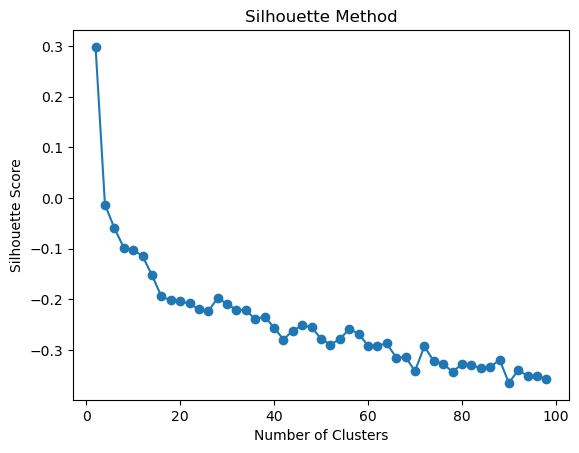

In [83]:
# Plotar o gráfico do Método Elbow
plt.plot(range(2, 100, 2), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

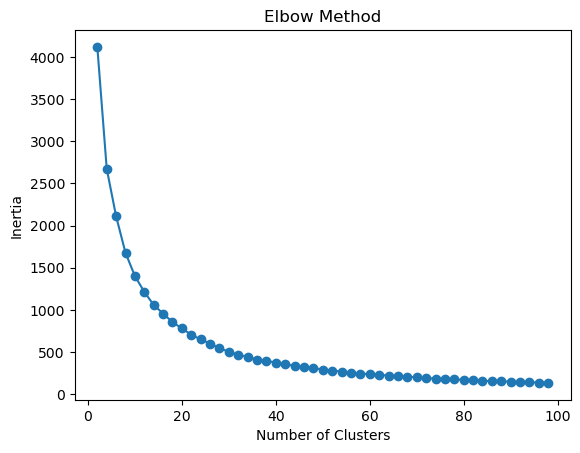

In [84]:
# Plotar o gráfico do Método Elbow
plt.plot(range(2, 100, 2), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

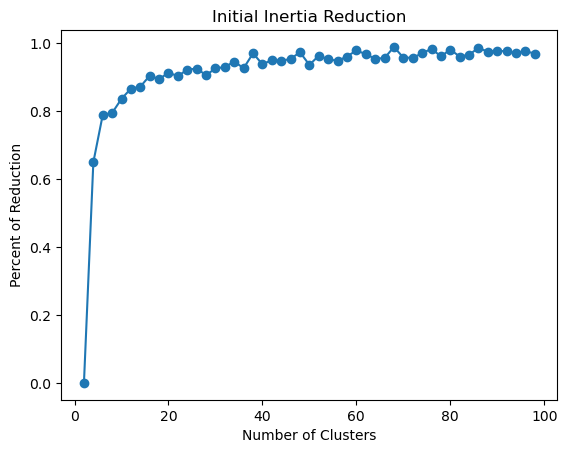

In [85]:
reduction = [0.0]
for i in range(len(inertias) - 1):
    try:
        reduction.append(inertias[i+1] / inertias[i])
    except:
        pass

# Plotar o gráfico de redução de inércia
plt.plot(range(2, 100, 2), reduction, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Percent of Reduction')
plt.title('Initial Inertia Reduction')
plt.show()

Nessa análise, 4 clusters resultaram em uma redução de cerca de 80% na inércia, enquanto 9 clusters proporcionaram uma redução de um pouco mais de 90%. Embora 4 clusters possam ser suficientes, optei por usar 9 clusters, pois acredito que eles explicam adequadamente a estrutura dos grupos. 

Embora a eficiência não seja significativamente maior com 9 clusters, essa escolha me permite obter uma segmentação mais detalhada dos dados. Portanto, a partir deste ponto, não considero necessário adicionar mais clusters, pois a diferença será mínima.

In [90]:
reduction[9]

print(f'Método Silhouette - Silhouette Score: {silhouette_scores[9]:.2f}')
print(f'Método Elbow - Inertia: {inertias[9]:.2f}')
print(f'Redução da Inércia Inicial - Percentual de Redução: {reduction[9]*100:.2f}%')

Método Silhouette - Silhouette Score: -0.20
Método Elbow - Inertia: 781.47
Redução da Inércia Inicial - Percentual de Redução: 91.30%


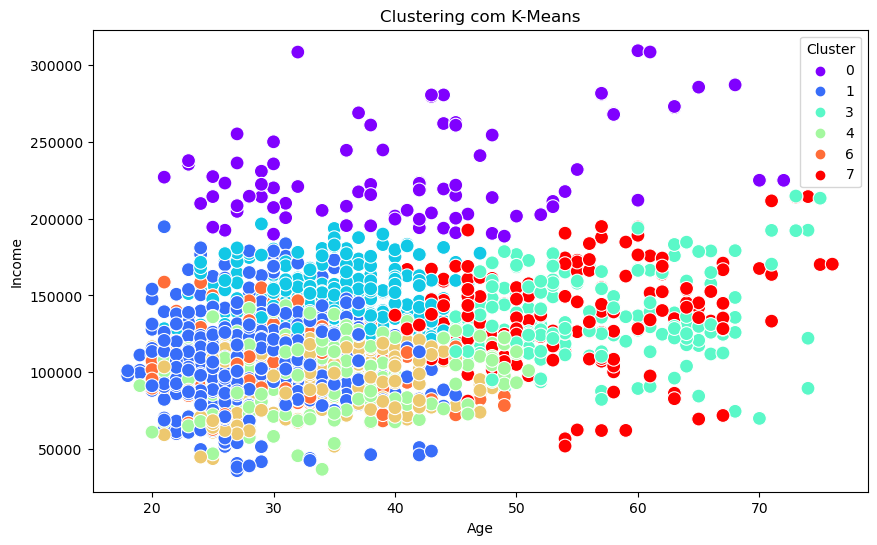

In [73]:
pipeline.named_steps['kmeans'].set_params(n_clusters=8, n_init=10)
cluster_labels = pipeline.fit_predict(X)

# Plotar os pontos coloridos por cluster usando Seaborn
plt.figure(figsize=(10, 6))  # Tamanho do gráfico (opcional)
sns.scatterplot(x=X['Age'], y=X['Income'], hue=cluster_labels, palette='rainbow', s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering com K-Means')

# Mostrar a legenda
plt.legend(title='Cluster', loc='upper right')

# Mostrar o gráfico
plt.show()

In [75]:
# salvar algoritmo
path_model = r"C:\Users\caio_\OneDrive\Documentos\Caio\PROJETOS - CIÊNCIAS DE DADOS\Git e GitHub\data-science-study-projects\unsupervised-learning\clustering---customer-clustering\algorithms\kmeans_model.joblib"

joblib.dump(pipeline, path_model)

['C:\\Users\\caio_\\OneDrive\\Documentos\\Caio\\PROJETOS - CIÊNCIAS DE DADOS\\Git e GitHub\\data-science-study-projects\\unsupervised-learning\\clustering---customer-clustering\\algorithms\\kmeans_model.joblib']